In [0]:
!unzip Participants_Data_Used_Cars.zip


Archive:  Participants_Data_Used_Cars.zip
   creating: Participants_Data_Used_Cars/
  inflating: Participants_Data_Used_Cars/Code.py  
  inflating: Participants_Data_Used_Cars/Code_Random_Forest.py  
  inflating: Participants_Data_Used_Cars/Data_Test.xlsx  
  inflating: Participants_Data_Used_Cars/Data_Train.xlsx  
  inflating: Participants_Data_Used_Cars/Sample_submission.xlsx  


In [0]:
%cd Participants_Data_Used_Cars

/content/Participants_Data_Used_Cars


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
train_data=pd.read_excel("Data_Train.xlsx")
test_data=pd.read_excel("Data_Test.xlsx")

**EDA**


In [3]:
#@title Default title text
#Identifying the number of features or columns
print("\nTraining Set : \n",'-' * 20, len(train_data.columns))
print("\nTest Set : \n",'-' * 20,len(test_data.columns))

#Identifying the features or columns
print("\nTraining Set : \n",'-' * 20, list(train_data.columns))
print("\nTest Set : \n",'-' * 20,list(test_data.columns))
#Identifying the data types of features
print("\nTraining Set : \n",'-' * 20,"\n", train_data.dtypes)
print("\nTest Set : \n",'-' * 20,"\n",test_data.dtypes)

#Identifying the number of observations
print("\nTraining Set : \n",'-' * 20,len(train_data))
print("\nTest Set : \n",'-' * 20,len(test_data))

#Checking if the dataset has empty cells or samples
print("\nTraining Set : \n",'-' * 20,train_data.isnull().values.any())
print("\nTest Set : \n",'-' * 20,test_data.isnull().values.any())

#Identifying the number of empty cells by features or columns
print("\nTraining Set : \n",'-' * 20,"\n", train_data.isnull().sum())
print("\nTest Set : \n",'-' * 20,"\n",test_data.isnull().sum())



Training Set : 
 -------------------- 13

Test Set : 
 -------------------- 12

Training Set : 
 -------------------- ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

Test Set : 
 -------------------- ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']

Training Set : 
 -------------------- 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Test Set : 
 -------------------- 
 Name                  object
Location              object
Year                

**DATA** **CLEANING**

In [0]:
#Name
#Training Set

names = list(train_data.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
train_data["Brand"] =  brand
train_data["Model"] = model
train_data.drop(labels = ['Name'], axis = 1, inplace = True)

#Test Set
names = list(test_data.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
test_data["Brand"] =  brand
test_data["Model"] = model
test_data.drop(labels = ['Name'], axis = 1, inplace = True)

#Mileage
# Training Set
mileage = list(train_data.Mileage)
for i in range(len(mileage)):
   try :
       mileage[i] = float(mileage[i].split(" ")[0].strip())
   except:
       mileage[i] = np.nan
train_data['Mileage'] = mileage

# Test Set
mileage = list(test_data.Mileage)
for i in range(len(mileage)):
   try :
       mileage[i] = float(mileage[i].split(" ")[0].strip())
   except:
       mileage[i] = np.nan
test_data['Mileage'] = mileage

#-----------------------------------------------------------------------

#Engine
# Training Set
engine = list(train_data.Engine)
for i in range(len(engine)):
   try :
       engine[i] = int(engine[i].split(" ")[0].strip())
   except:
       engine[i] = np.nan
train_data['Engine'] = engine

# Test Set
engine = list(test_data.Engine)
for i in range(len(engine)):
   try :
       engine[i] = int(engine[i].split(" ")[0].strip())
   except:
       engine[i] = np.nan
test_data['Engine'] = engine


#-----------------------------------------------------------------------
#Power
# Training Set
power = list(train_data.Power)
for i in range(len(power)):
   try :
       power[i] = float(power[i].split(" ")[0].strip())
   except:
       power[i] = np.nan
train_data['Power'] = power

# test Set
power = list(test_data.Power)
for i in range(len(power)):
   try :
       power[i] = float(power[i].split(" ")[0].strip())
   except:
       power[i] = np.nan
test_data['Power'] = power

#-----------------------------------------------------------------------
train_data.drop(labels = ['New_Price'], axis = 1, inplace = True)
test_data.drop(labels = ['New_Price'], axis = 1, inplace = True)
#-----------------------------------------------------------------------

#Re-ordering the columns
train_data = train_data[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
test_data = test_data[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

**VISUALIZATION**

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Name: Brand, dtype: int64


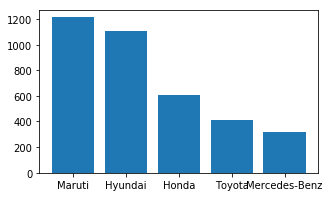

Model
XUV500 W8 2WD      49
Swift VDI          45
City 1.5 S MT      34
Swift Dzire VDI    34
Swift VDI BSIV     31
Name: Model, dtype: int64


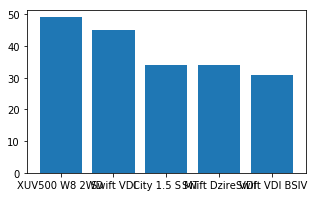

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Name: Location, dtype: int64


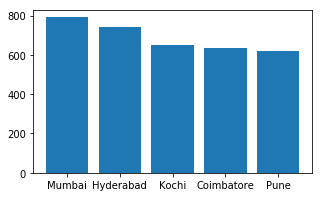

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


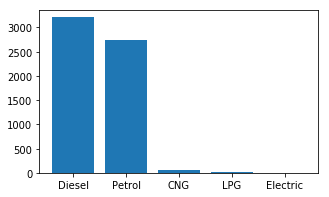

Transmission
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64


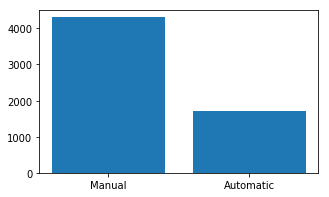

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


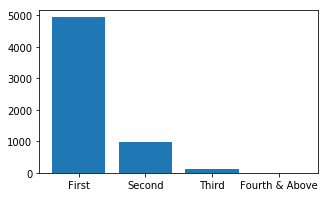

In [5]:
#Categorical variables distribution
categories=['Brand', 'Model', 'Location','Fuel_Type', 'Transmission', 'Owner_Type']
for i, c in enumerate(categories):
    v = train_data[c].unique()
    
    g = train_data.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()


**Exploring Categorical features**

In [6]:

#combining training set and test set data
all_brands = list(train_data.Brand) + list(test_data.Brand)
all_locations = list(train_data.Location) + list(test_data.Location)
all_fuel_types = list(train_data.Fuel_Type) + list(test_data.Fuel_Type)
all_transmissions = list(train_data.Transmission) + list(test_data.Transmission)
all_owner_types = list(train_data.Owner_Type) + list(test_data.Owner_Type)

print("\nNumber Of Unique Values In Name : \n ", len(set(all_brands)))
print("\nThe Unique Values In Name : \n ", set(all_brands))

print("\nNumber Of Unique Values In Location : \n ", len(set(all_locations)))
print("\nThe Unique Values In Location : \n ", set(all_locations) )

print("\nNumber Of Unique Values In Fuel_Type : \n ", len(set(all_fuel_types)))
print("\nThe Unique Values In Fuel_Type : \n ", set(all_fuel_types) )

print("\nNumber Of Unique Values In Transmission : \n ", len(set(all_transmissions)))
print("\nThe Unique Values In Transmission : \n ", set(all_transmissions) )

print("\nNumber Of Unique Values In Owner_Type : \n ", len(set(all_owner_types)))
print("\nThe Unique Values In Owner_Type : \n " ,set(all_owner_types))



Number Of Unique Values In Name : 
  33

The Unique Values In Name : 
  {'Ambassador', 'Datsun', 'Ford', 'Volvo', 'Mercedes-Benz', 'Honda', 'ISUZU', 'Tata', 'Audi', 'Hindustan', 'Renault', 'Smart', 'Mahindra', 'Force', 'Mitsubishi', 'Hyundai', 'Land', 'BMW', 'OpelCorsa', 'Jeep', 'Nissan', 'Skoda', 'Volkswagen', 'Fiat', 'Isuzu', 'Porsche', 'Lamborghini', 'Chevrolet', 'Mini', 'Bentley', 'Maruti', 'Jaguar', 'Toyota'}

Number Of Unique Values In Location : 
  11

The Unique Values In Location : 
  {'Kochi', 'Hyderabad', 'Delhi', 'Bangalore', 'Pune', 'Chennai', 'Coimbatore', 'Jaipur', 'Kolkata', 'Mumbai', 'Ahmedabad'}

Number Of Unique Values In Fuel_Type : 
  5

The Unique Values In Fuel_Type : 
  {'Diesel', 'LPG', 'Petrol', 'CNG', 'Electric'}

Number Of Unique Values In Transmission : 
  2

The Unique Values In Transmission : 
  {'Automatic', 'Manual'}

Number Of Unique Values In Owner_Type : 
  4

The Unique Values In Owner_Type : 
  {'Fourth & Above', 'First', 'Third', 'Second'}


**Encoding Categorical Variables**

In [0]:
#'Brand', 'Model', 'Location','Fuel_Type', 'Transmission', 'Owner_Type'

all_brands = list(set(list(train_data.Brand) + list(test_data.Brand)))
all_models = list(set(list(train_data.Model) + list(test_data.Model)))
all_locations = list(set(list(train_data.Location) + list(test_data.Location)))
all_fuel_types = list(set(list(train_data.Fuel_Type) + list(test_data.Fuel_Type)))
all_transmissions = list(set(list(train_data.Transmission) + list(test_data.Transmission)))
all_owner_types = list(set(list(train_data.Owner_Type) + list(test_data.Owner_Type)))

#Initializing label encoders and fitting the categories

#Initializing label encoders
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()

#Fitting the categories
le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)

#Transforming the data in training set and test_data

#Applying encoding to train_data data
train_data['Brand'] = le_brands.transform(train_data['Brand'])
train_data['Model'] = le_models.transform(train_data['Model'])
train_data['Location'] = le_locations.transform(train_data['Location'])
train_data['Fuel_Type'] = le_fuel_types.transform(train_data['Fuel_Type'])
train_data['Transmission'] = le_transmissions.transform(train_data['Transmission'])
train_data['Owner_Type'] = le_owner_types.transform(train_data['Owner_Type'])

#Applying encoding to test_data data
test_data['Brand'] = le_brands.transform(test_data['Brand'])
test_data['Model'] = le_models.transform(test_data['Model'])
test_data['Location'] = le_locations.transform(test_data['Location'])
test_data['Fuel_Type'] = le_fuel_types.transform(test_data['Fuel_Type'])
test_data['Transmission'] = le_transmissions.transform(test_data['Transmission'])
test_data['Owner_Type'] = le_owner_types.transform(test_data['Owner_Type'])

**Correlation plot**

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Brand,1.000000,0.173716,0.026862,0.018888,0.027777,-0.060974,0.171743,-0.028036,-0.013943,0.004294,-0.185523,0.186473,-0.137949
Model,0.173716,1.000000,0.004142,-0.024191,0.034713,-0.037537,0.176497,-0.000645,0.003212,-0.072466,-0.107102,0.084436,-0.086954
Location,0.026862,0.004142,1.000000,-0.020117,-0.042751,0.115048,0.040174,-0.033889,0.018778,-0.078605,-0.065836,-0.037401,-0.116620
Year,0.018888,-0.024191,-0.020117,1.000000,-0.173048,-0.129526,-0.097059,-0.386160,0.321565,-0.052197,0.014525,0.012333,0.305327
Kilometers_Driven,0.027777,0.034713,-0.042751,-0.173048,1.000000,-0.102953,0.025663,0.079924,-0.065253,0.091068,0.033503,0.083113,-0.011493
Fuel_Type,-0.060974,-0.037537,0.115048,-0.129526,-0.102953,1.000000,0.125219,0.043017,-0.152126,-0.402345,-0.267167,-0.299100,-0.305207
Transmission,0.171743,0.176497,0.040174,-0.097059,0.025663,0.125219,1.000000,0.003002,0.333235,-0.500381,-0.643737,0.075475,-0.586025
Owner_Type,-0.028036,-0.000645,-0.033889,-0.386160,0.079924,0.043017,0.003002,1.000000,-0.154193,0.048800,0.029371,0.003725,-0.094559
Mileage,-0.013943,0.003212,0.018778,0.321565,-0.065253,-0.152126,0.333235,-0.154193,1.000000,-0.597699,-0.537729,-0.308226,-0.306593
Engine,0.004294,-0.072466,-0.078605,-0.052197,0.091068,-0.402345,-0.500381,0.048800,-0.597699,1.000000,0.866185,0.393337,0.658354


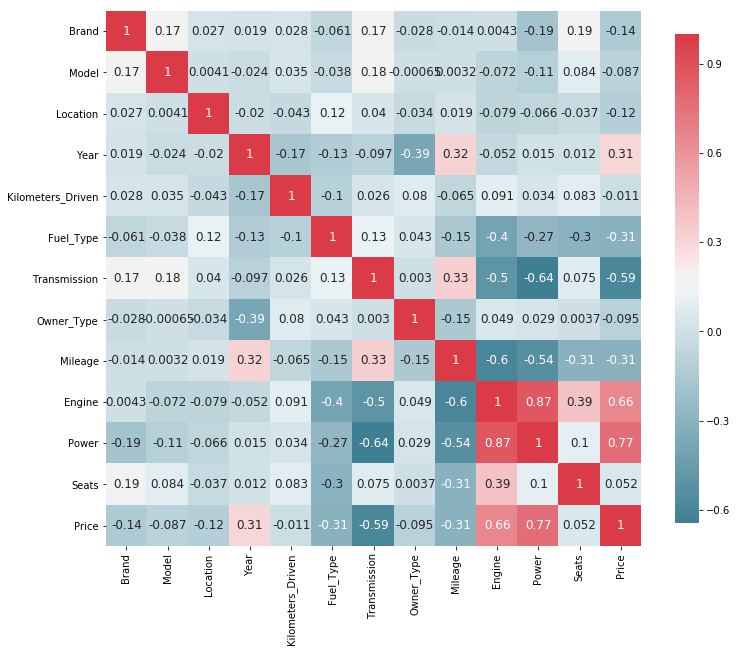

In [8]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

#Removing Correlation
#train_data=train_data.drop(['Engine','Power'],axis=1)

#plot_correlation_map(train_data)
#train_data.corr()
plot_correlation_map(train_data)
train_data.corr()




In [0]:
#Removing Correlation
train_data=train_data.drop(['Engine'],axis=1)
test_data = test_data.drop(['Engine'],axis=1)


**Imputing Missing Values**

In [0]:
#Training Set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(train_data) 
Imp_train_data = imputer.transform(train_data)

In [0]:
#test_data Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(test_data) 
Imp_test_data = imputer.transform(test_data)

In [0]:
pd.DataFrame(Imp_test_data).head()

,0,1,2,3,4,5,6,7,8,9,10
0,19.0,157.0,4.0,2014.0,40929.0,0.0,1.0,0.0,32.26,58.20,4.0
1,19.0,147.0,3.0,2013.0,54493.0,4.0,1.0,2.0,24.70,47.30,5.0
2,30.0,975.0,9.0,2017.0,34000.0,1.0,1.0,0.0,13.68,147.80,7.0
3,30.0,706.0,5.0,2012.0,139000.0,1.0,1.0,0.0,23.59,74.00,5.0
4,11.0,2023.0,9.0,2014.0,29000.0,4.0,1.0,0.0,18.50,82.85,5.0


In [0]:
train_data.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price
0,19,1797,9,2010,72000,0,1,0,26.60,58.16,5.0,1.75
1,11,498,10,2015,41000,1,1,0,19.67,126.20,5.0,12.50
2,10,993,2,2011,46000,4,1,0,18.20,88.70,5.0,4.50
3,19,676,2,2012,87000,1,1,0,20.77,88.76,7.0,6.00
4,1,105,3,2013,40670,1,0,2,15.20,140.80,5.0,17.74


In [0]:
test_data.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats
0,19,157,4,2014,40929,0,1,0,32.26,58.20,4.0
1,19,147,3,2013,54493,4,1,2,24.70,47.30,5.0
2,30,975,9,2017,34000,1,1,0,13.68,147.80,7.0
3,30,706,5,2012,139000,1,1,0,23.59,NaN,5.0
4,11,2023,9,2014,29000,4,1,0,18.50,82.85,5.0


In [0]:
df = pd.DataFrame(Imp_train_data)

In [13]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [14]:
y = df[[11]]
print(y.head())

      11
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74


In [15]:
y.isnull().sum()

11    0
dtype: int64

In [0]:
df = df.iloc[:,:-1]

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,19.0,1797.0,9.0,2010.0,72000.0,0.0,1.0,0.0,26.60,58.16,5.0
1,11.0,498.0,10.0,2015.0,41000.0,1.0,1.0,0.0,19.67,126.20,5.0
2,10.0,993.0,2.0,2011.0,46000.0,4.0,1.0,0.0,18.20,88.70,5.0
3,19.0,676.0,2.0,2012.0,87000.0,1.0,1.0,0.0,20.77,88.76,7.0
4,1.0,105.0,3.0,2013.0,40670.0,1.0,0.0,2.0,15.20,140.80,5.0


In [18]:
print(df.shape)
print(y.shape)

(6019, 11)
(6019, 1)


**Data Split**

In [0]:
#Scaling Original Training Data
sc = StandardScaler()

#Scaling Original Training Data
df = sc.fit_transform(df)
y = sc.fit_transform(y)


In [20]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print("X_train =", X_train.shape,"y_train =" , y_train.shape)
print("X_test =", X_test.shape,"y_test =",  y_test.shape)


X_train = (4815, 11) y_train = (4815, 1)
X_test = (1204, 11) y_test = (1204, 1)


In [0]:
pd.DataFrame(X_train).head()

In [0]:
pd.DataFrame(y_train).head()

In [0]:
pd.DataFrame(X_test).head()

In [0]:
pd.DataFrame(y_test).head()

**Model**

In [0]:
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
'learning_rate':[0.1,0.07],
'max_depth':[3,5],
   'n_estimators':[10000],
   'reg_alpha':[1e-5, 1e-2,  0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
   'subsample':[0.6,0.95]  
}
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

In [22]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.8,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.8,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

[09:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.8,
             verbosity=1)

In [23]:
best_xgb_model_2=xgboost.XGBRegressor(
                        base_score=0.5,
                        booster='gbtree',
                        colsample_bylevel=1,
                        colsample_bynode=1,
                        colsample_bytree=0.8,
                        gamma=0,
                       importance_type='gain',
                       learning_rate=0.1, 
                       max_delta_step=0,
                       max_depth=5,
                       min_child_weight=1, 
                       missing=None,
                       n_estimators=1000,
                       n_jobs=1,
                       nthread=6,
                       objective='reg:linear',
                       random_state=0,
                       reg_alpha=0, 
                       reg_lambda=1, 
                       scale_pos_weight=1,
                       seed=27,
                       silent=None,
                       subsample=0.8,
                       verbosity=1)
best_xgb_model_2.fit(X_train,y_train)

[09:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=6, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.8, verbosity=1)

In [24]:
print('The accuracy of the xgboost is {:.2f} out of 1 on the training data'.format(best_xgb_model.score(X_train, y_train)))
print('The accuracy of the xgboost is {:.4f} out of 1 on the test data'.format(best_xgb_model.score(X_test, y_test)))
print('The accuracy of the xgboost_2 is {:.4f} out of 1 on the test data'.format(best_xgb_model_2.score(X_test, y_test)))

The accuracy of the xgboost is 1.00 out of 1 on the training data
The accuracy of the xgboost is 0.8748 out of 1 on the test data
The accuracy of the xgboost_2 is 0.8734 out of 1 on the test data


In [0]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))

In [0]:
y_pred = best_xgb_model.predict(X_test)

In [27]:
pd.DataFrame(y_test,y_pred).head()

,0
-0.334395,-0.376283
3.322362,3.641779
-0.640926,-0.691828
-0.089106,0.135920
0.035823,-0.132249


In [0]:
X_test_ori = sc.inverse_transform(X_test)

In [0]:
y_test_ori = sc.inverse_transform(y_test)
y_pred_ori = sc.inverse_transform(y_pred)

In [30]:
pd.DataFrame(y_test_ori,y_pred_ori).head()

,0
5.738594,5.27
46.646694,50.22
2.309441,1.74
8.482644,11.00
9.880222,8.00


In [31]:
rmsle(y_test_ori, y_pred_ori)

0.9278875001512467

In [0]:
dft = pd.DataFrame(Imp_test_data)

In [34]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,10
0,19.0,157.0,4.0,2014.0,40929.0,0.0,1.0,0.0,32.26,58.20,4.0
1,19.0,147.0,3.0,2013.0,54493.0,4.0,1.0,2.0,24.70,47.30,5.0
2,30.0,975.0,9.0,2017.0,34000.0,1.0,1.0,0.0,13.68,147.80,7.0
3,30.0,706.0,5.0,2012.0,139000.0,1.0,1.0,0.0,23.59,74.00,5.0
4,11.0,2023.0,9.0,2014.0,29000.0,4.0,1.0,0.0,18.50,82.85,5.0


In [0]:
dft = sc.fit_transform(dft)

In [0]:
dft

array([[ 0.30009112, -1.34538264, -0.53870012, ...,  3.15634249,
        -1.00116036, -1.55956029],
       [ 0.30009112, -1.36151732, -0.86811338, ...,  1.46234081,
        -1.21414407, -0.34306383],
       [ 1.57503225, -0.02556575,  1.10836616, ..., -1.00695793,
         0.74960487,  2.08992909],
       ...,
       [ 0.76370608,  0.17773122,  0.7789529 , ...,  1.09934045,
        -0.90541538, -0.34306383],
       [ 1.69093599,  0.4213649 ,  1.43777942, ..., -0.21821641,
        -0.11405387, -0.34306383],
       [ 0.41599486, -0.70967622,  0.44953965, ..., -1.83155134,
         1.18338822, -0.34306383]])

In [0]:
test_pred = best_xgb_model.predict(dft)

In [37]:
pd.DataFrame(test_pred).head()

,0
0,-0.544989
1,-0.579110
2,0.724251
3,-0.564979
4,-0.409175


In [0]:
test_pred

array([-0.55743706, -0.550027  ,  0.93082964, ..., -0.41186273,
       -0.2934528 ,  0.60470533], dtype=float32)

In [0]:
final = pd.DataFrame(test_pred)

In [0]:
final.to_csv("submission.csv")

**SVR**

In [39]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
print('Score: %.4f' % svr.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score: 0.8349


**Random Forest**

In [41]:
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [300]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)
bp = gs.best_params_


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [42]:
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
# Explained variance score: 1 is perfect prediction
print('Score: %.4f' % forest.score(X_test, y_test))

Score: 0.8340
